## OBJECTIVES
Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

* What is the overall sales trend?

* Which are the Top 10 products by sales?

* Which are the Most Selling Products?

* Which is the most preferred Ship Mode?

* Which are the Most Profitable Category and Sub-Category?

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
import os, sys

In [42]:
os.getcwd()

'C:\\Users\\Deborah Lambert'

In [43]:
#importing data

df = pd.read_excel(r'C:\Users\Deborah Lambert\Downloads\superstore_sales.xlsx')

In [44]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [52]:
df.shape

(51290, 21)

In [46]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [50]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


There appears to be no missing entries.

In [66]:
#collecting the month and year from the ship date
df['month_year'] = df['ship_date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['sales'].reset_index()



AttributeError: 'AxesSubplot' object has no attribute 'set_ticks'

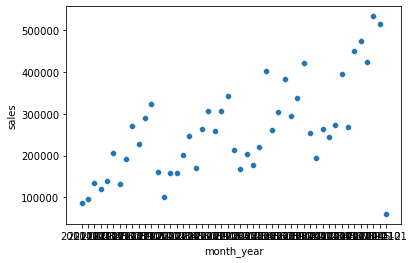

In [67]:
g = sns.scatterplot(x=df_temp['month_year'], y=df_temp["sales"], palette='deep')
g.set_ticks(rotation=90)
plt.show()

Not as clear, but a sort of zig zag pattern is emerging. lets try a line graph

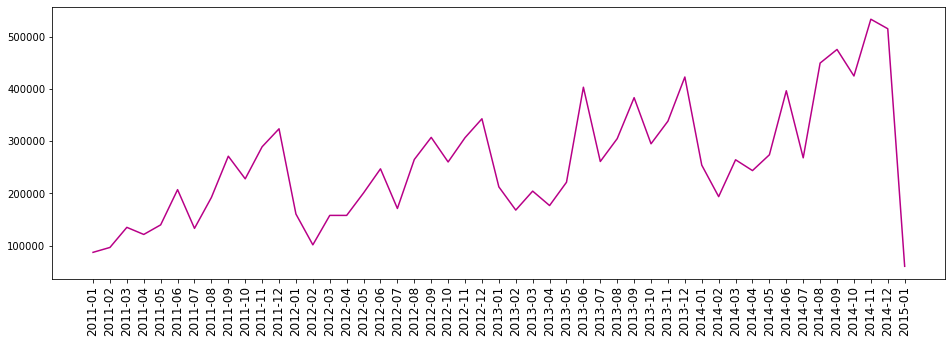

In [70]:
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80087')
plt.xticks(rotation='vertical', size=12)
plt.show()

Looks like there is always a significant drop in sales around the new year. Avery large drop from December 2014 to January 2015. I wonder why that is?

### Top 10 products by sales

In [73]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Bottom 10 products in sales

In [77]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=True)

# Top 10 products by sales
prod_sales[:10]

,sales
product_name,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,1.624
Avery 5,5.760
Xerox 20,6.480
Grip Seal Envelopes,7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Xerox 1989,7.968
4009 Highlighters,8.040
Stockwell Gold Paper Clips,8.096


### Top 10 Countries in sales

In [74]:
# Grouping products by sales
country_sales = pd.DataFrame(df.groupby('country').sum()['sales'])

# Sorting the dataframe in descending order
country_sales.sort_values(by=['sales'], inplace=True, ascending=False)

# Top 10 products by sales
country_sales[:10]

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


### Bottom 10 countries in sales

In [76]:
# Grouping products by sales
country_sales = pd.DataFrame(df.groupby('country').sum()['sales'])

# Sorting the dataframe in descending order
country_sales.sort_values(by=['sales'], inplace=True, ascending=True)

# Top 10 products by sales
country_sales[:10]

,sales
country,
Equatorial Guinea,150.510
Armenia,156.750
Eritrea,187.740
Macedonia,209.640
Tajikistan,242.784
Burundi,267.720
Swaziland,288.030
Bahrain,669.180
United Arab Emirates,744.120


### Most Selling Product by quantity

In [80]:
# Grouping products by sales
product_sales = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
product_sales.sort_values(by=['quantity'], inplace=True, ascending=False)

# Top 10 products by sales
product_sales[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### Least Selling Products

In [82]:
# Grouping products by sales
product_sales = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

# Sorting the dataframe in descending order
product_sales.sort_values(by=['quantity'], inplace=True, ascending=True)

# Top 10 products by sales
product_sales[:10]

,quantity
product_name,
Penpower WorldCard Pro Card Scanner,1
Boston 1900 Electric Pencil Sharpener,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Chromcraft Training Table, Adjustable Height",1
Xerox 20,1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,2
Avery 5,2
Xerox 1984,2


###  Preferred Shipping Mode

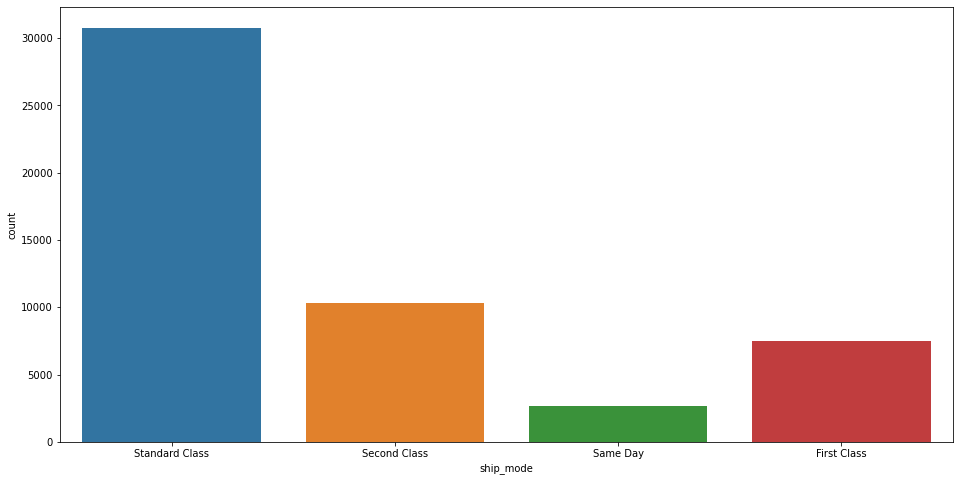

In [84]:
plt.figure(figsize=(16,8))

sns.countplot(x='ship_mode', data=df)

plt.show()

### Profits by Category and sub category

In [91]:
# Grouping products by sales
cat_sales = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the dataframe in descending order
cat_sales.sort_values(by=['category', 'profit'], inplace=True, ascending=False)


cat_sales

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870